In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as mpath
import numpy as np
import random

In [35]:
def create_polygon_vtx(n_vtx, x, y, size, angle):
    """Creates a Path object for a regular polygon with n_vtx vertices."""
    # Calculate the angle between vertices
    phi = 2 * np.pi / n_vtx
    
    # Generate vertices for the polygon
    verts = [(np.cos(i * phi + angle) * size / 2 + x, np.sin(i * phi + angle) * size / 2 + y) for i in range(n_vtx)]
    verts.append(verts[0])  # Close the polygon by repeating the first vertex
    return verts

def add_radius(r_fraction, verts):
    """Add a radius to a list of vertices."""
    # iterate vtx from 0 to n-1, 0 in pairs, 
    # find positions of 0, r_fraction, 1-r_fraction
    # and add them to the list
    verts_r = []
    for b, e in zip(verts[:-1], verts[1:]):
        # b and e are tuples of x, y coords
        b_x, b_y = b
        e_x, e_y = e
        # find the distance between the two points
        b_r = b_x + (e_x - b_x) * r_fraction, b_y + (e_y - b_y) * r_fraction
        e_r = b_x + (e_x - b_x) * (1 - r_fraction), b_y + (e_y - b_y) * (1 - r_fraction)
        verts_r.append(b_r)
        verts_r.append(e_r)
        verts_r.append(e)
        
    
    # start from first point
    verts_r = verts_r + [verts_r[0]]

    return verts_r
        

    
def create_polygon_path(verts, color):
    """Creates a Path object for a regular polygon with n_vtx vertices."""
    # Calculate the angle between vertices
    n_vtx = (len(verts)-1)//3

    # each vtx is mpath.Path.LINETO, mpath.Path.CURVE3, mpath.Path.CURVE3

    codes = [mpath.Path.MOVETO] + \
        [mpath.Path.LINETO, 
         mpath.Path.CURVE3,
         mpath.Path.CURVE3
         ] * n_vtx 
         #  + [mpath.Path.CLOSEPOLY]
    
    path = mpath.Path(verts, codes)

    patch = patches.PathPatch(path, color=color, lw=2)
    return patch

In [94]:
fig_to_vtx = {'square':4,
              'triangle':3,
              'pentagon':5,
              'circle':32,
}
def draw_shape(ax, n_vtx, x, y, size, angle, color='blue', r_fraction=0.01):
    n_vtx = n_vtx if isinstance(n_vtx, int) else fig_to_vtx['square']
    verts = create_polygon_vtx(n_vtx, x, y, size, angle)
    verts = add_radius(r_fraction=r_fraction, verts=verts)

    path = create_polygon_path(verts, color=color)    
    ax.add_patch(path)

def create_canvas(figures, title, figs=None, grid_size=(8, 8)):
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')
    ax.set_xlim(0, grid_size[0])
    ax.set_ylim(0, grid_size[1])
    ax.axis('off')

    # Draw the figures
    _figs = []
    for shape, color, r_fraction, mean_size, std_size in figures:
        # Random position within the grid
        x = random.uniform(mean_size*.6, grid_size[0] - 1.6 * mean_size)
        y = random.uniform(mean_size*.6, grid_size[1] - 1.6 * mean_size)
        #print('range: ', (mean_size, grid_size[0] - 2 * mean_size), (mean_size, grid_size[1] - 2 * mean_size), (x, y))
        
        # Random size with given mean and standard deviation
        size = np.clip(np.random.normal(mean_size, std_size), mean_size / 2, mean_size * 1.5)
        
        # Random rotation angle
        angle = random.uniform(0, 360)
        
        draw_shape(ax, shape, x, y, size, angle, color=color, r_fraction=r_fraction)
        _figs.append((shape, x, y, size, angle, color, r_fraction))
    
    if figs is not None:
        for (shape, x, y, size, angle, color, r_fraction) in figs:
            draw_shape(ax, shape, x, y, size, angle, color=color, r_fraction=r_fraction)

    plt.title(title, fontsize=16)
    plt.show()
    plt.close()
    return _figs



In [95]:
# Step 1: Two squares and two triangles
r_s = 0.005
r_r = 0.1

sz = 2
std = 0.1

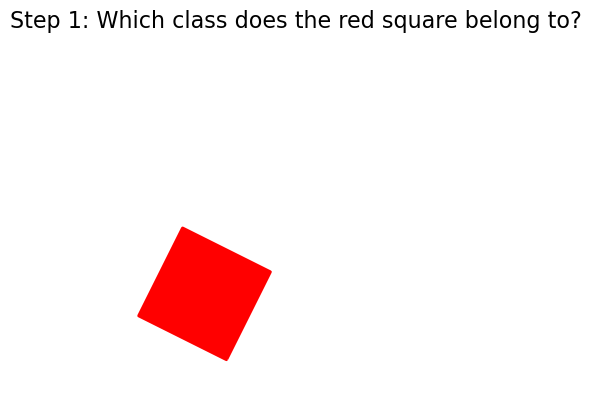

In [96]:
figures_step0 = [
    (4, 'red',  r_s, 1.5*sz, std),
]
_=create_canvas(figures_step0, "Step 1: Which class does the red square belong to?")


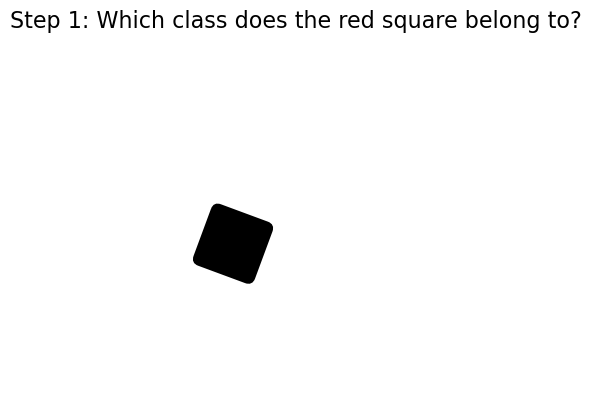

In [161]:
figures_step0 = [
    (4, 'black',  r_r, 1.*sz, std),
]
_=create_canvas(figures_step0, "Step 1: Which class does the red square belong to?")


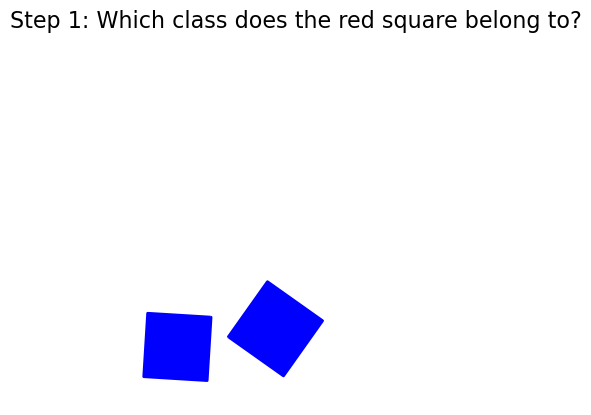

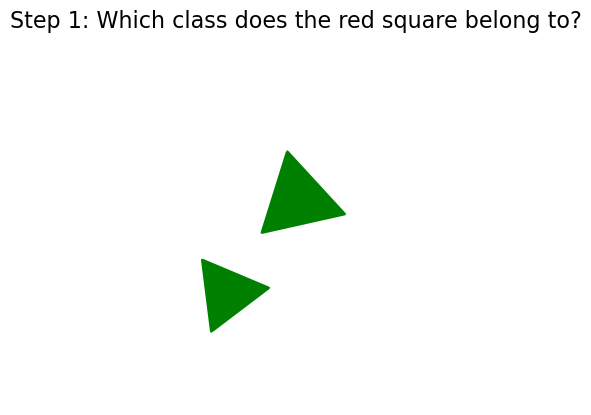

In [99]:
figures_step1 = [
    (4, 'blue',  r_s, sz, std),
    (4, 'blue',  r_s, sz, std),
]
_=create_canvas(figures_step1, "Step 1: Which class does the red square belong to?")

figures_step1 = [
    (3, 'green', r_s, sz, std),
    (3, 'green', r_s, sz, std),
]
_=create_canvas(figures_step1, "Step 1: Which class does the red square belong to?")


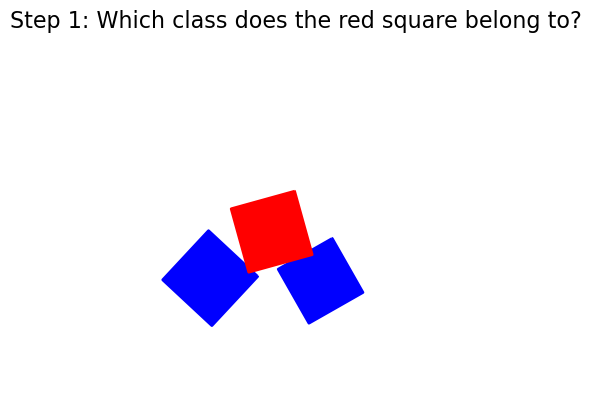

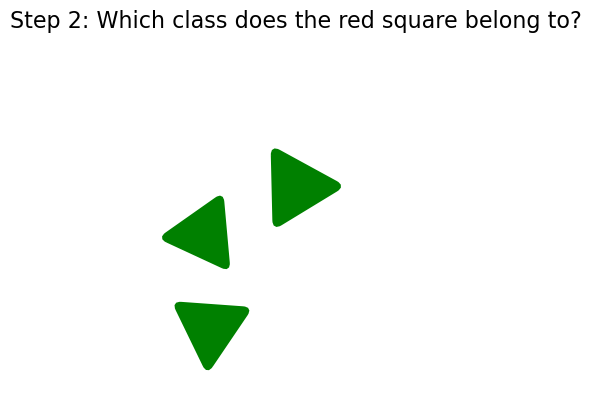

In [108]:

# Step 2: Three squares and three triangles (all with rounded corners on the right)
figures_step2 = [
    (4, 'blue',  r_s, sz, std),
    (4, 'blue',  r_s, sz, std),
    (4, 'red',   r_s, sz, std),
]
f21=create_canvas(figures_step2, "Step 1: Which class does the red square belong to?")

figures_step2 = [
    (3, 'green', r_r, sz, std),
    (3, 'green', r_r, sz, std),
    (3, 'green', r_r, sz, std),
]
f22=create_canvas(figures_step2, "Step 2: Which class does the red square belong to?")



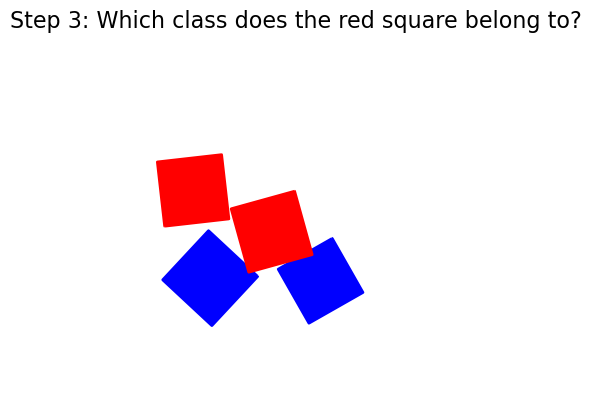

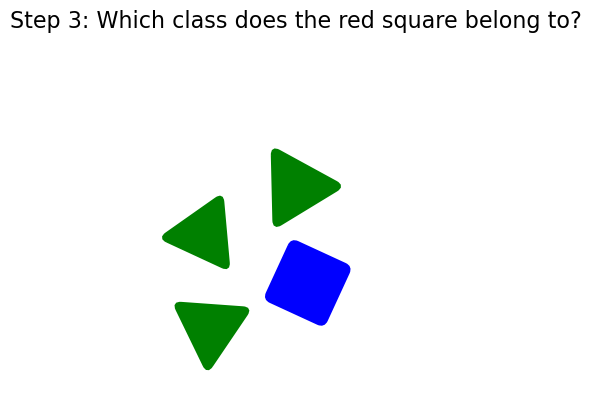

[(4,
  4.257096430497275,
  2.641711237460236,
  1.9965144379212818,
  290.95103016170594,
  'blue',
  0.1)]

In [137]:
# Step 3: Four squares and four triangles (revealing new patterns)
figures_step3 = [
    (4, 'red',   r_s, sz, std),
]
create_canvas(figures_step3,
               "Step 3: Which class does the red square belong to?",
               figs=f21)

figures_step3 = [
    (4, 'blue',  r_r, sz, std),
]
create_canvas(figures_step3,
               "Step 3: Which class does the red square belong to?",
               figs=f22)